In [1]:
%cd ..

/home/juanhevia/IDIL


In [4]:
import os
import numpy as np
import pickle as pkl

INPUT_EXPERTS_NAME = "CleanupSingle-v0_100.pkl"
EXPERTS_PATH = "idil_train/experts/"

def load_experts(input_experts, root:str = EXPERTS_PATH):
    with open(os.path.join(root, input_experts), "rb") as f:
        experts = pkl.load(f)

    return experts

In [3]:
original_experts = load_experts(INPUT_EXPERTS_NAME)

In [5]:
print(f"Gotten object: {type(original_experts)} for {INPUT_EXPERTS_NAME}")
print(f"Keys are: {original_experts.keys() if hasattr(original_experts, 'keys') else 'No keys'}")

Gotten object: <class 'dict'> for CleanupSingle-v0_100.pkl
Keys are: dict_keys(['states', 'next_states', 'actions', 'latents', 'rewards', 'dones', 'lengths'])


In [10]:
print(f"Gotten {len(original_experts['states'])} expert trajectories")

for key in original_experts.keys():
    print(f"Key: {key} has length: {len(original_experts[key])}")

Gotten 100 expert trajectories
Key: states has length: 100
Key: next_states has length: 100
Key: actions has length: 100
Key: latents has length: 100
Key: rewards has length: 100
Key: dones has length: 100
Key: lengths has length: 100


In [12]:
# get new train and test sets
IDX_SPLIT = int(len(original_experts['states']) * 0.7)

train_experts = {key: original_experts[key][:IDX_SPLIT] for key in original_experts.keys()}
test_experts = {key: original_experts[key][IDX_SPLIT:] for key in original_experts.keys()}

In [13]:
# assess new lengths for each key
print(f"Train set has {len(train_experts['states'])} expert trajectories")

for key in train_experts:
    print(f"Key: {key} has length: {len(train_experts[key])}")

print("---"*10)

print(f"Test set has {len(test_experts['states'])} expert trajectories")
for key in test_experts:
    print(f"Key: {key} has length: {len(test_experts[key])}")


Train set has 70 expert trajectories
Key: states has length: 70
Key: next_states has length: 70
Key: actions has length: 70
Key: latents has length: 70
Key: rewards has length: 70
Key: dones has length: 70
Key: lengths has length: 70
------------------------------
Test set has 30 expert trajectories
Key: states has length: 30
Key: next_states has length: 30
Key: actions has length: 30
Key: latents has length: 30
Key: rewards has length: 30
Key: dones has length: 30
Key: lengths has length: 30


In [14]:
# store train split in a new file
new_train_file = INPUT_EXPERTS_NAME.replace(".pkl", f"_train{IDX_SPLIT}.pkl")
new_test_file = INPUT_EXPERTS_NAME.replace(".pkl", f"_test{IDX_SPLIT}.pkl")

TEST_PATH = "idil_train/test_data/"

# save train file
with open(os.path.join(EXPERTS_PATH, new_train_file), "wb") as f:
    pkl.dump(train_experts, f)

# save test file to test_data
with open(os.path.join(TEST_PATH, new_test_file), "wb") as f:
    pkl.dump(test_experts, f)

# Check `MultiGoals` splits

In [9]:
import matplotlib.pyplot as plt

In [5]:
INPUT_EXPERTS_NAME = "MultiGoals2D_3-v0_50.pkl"

mg_test = load_experts(INPUT_EXPERTS_NAME, root="idil_train/test_data/")

In [7]:
len(mg_test["states"])

50

(array([5., 5., 5., 6., 5., 6., 8., 6., 3., 1.]),
 array([57. , 60.6, 64.2, 67.8, 71.4, 75. , 78.6, 82.2, 85.8, 89.4, 93. ]),
 <BarContainer object of 10 artists>)

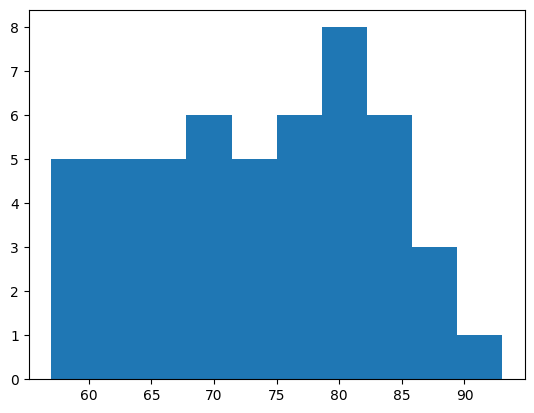

In [10]:
_lens = [len(mg_test["states"][idx])  for idx in range(len(mg_test["states"]))]
plt.hist(_lens)

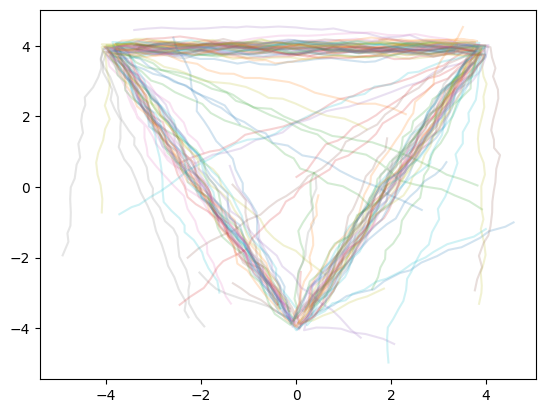

In [12]:
fig, ax = plt.subplots(1,1)

for idx in range(len(mg_test["states"])):
    _arr = np.array(mg_test["states"][idx])
    ax.plot(_arr[:,0], _arr[:,1], alpha=0.2)
